<a href="https://colab.research.google.com/github/Aman78695/recommendation-system-using-apriori-market-based/blob/main/market_based_recommended_system_using_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation Systems: ARL (Association Rule Learning)**

Recommendation systems aim to recommend content, products and services to users using some methods and algorithms. Although it has been used since the 90s, it has been used extensively in data analytics since 2009.

While content is plentiful, users’ interests tend to be more customized to the entire content set and differ from person to person. In order not to get lost in this abundant cluster and to reach the desired personalized service according to the field of interest, various filters should be made. These filters and algorithms appear as “Recommendation Systems”. It is used in many areas such as dating applications, e-commerce sites, social media channels etc.

**Recommendation systems can be examined under 4 main headings:**



*   **Simple Recommender Systems:** Makes general recommendations with business knowledge or simple sequencing techniques.


*  **Association Rule Learning:** Makes suggestions according to the rules learned through association analysis.



*  **Content-Based Filtering:** Makes recommendations based on similarities of products.


*  **Collaborative Filtering:** Makes recommendations based on user or product according to common opinions. It is divided into 3 as User-Based, Product-Based, and Model-Based.





# **Simple Recommender Systems**


Simple Recommender systems are not concerned with user behaviour or product features. These systems generally focus on the preferred, popular, legendary products, that have the highest score, etc. and recommend these products directly to the user.

# **Association Rule Learning**


It is a rule-based machine learning technique used to find patterns in data. The Apriori Algorithm is used while the Association Rule Learning takes place. Apriori is a basket analysis method used to reveal product associations. There are 3 significant metrics in Apriori:



*  **Support**: Measures how often products X and Y are purchased together

            Support(X, Y) = Freq(X, Y) / Total Transaction



*  **Confidence:** Probability of purchasing product Y when product X is purchased

              Confidence(X, Y) = Freq(X, Y) / Freq(X)



*  **Lift:** The coefficient of increase in the probability of purchasing product Y when product X is purchased.

              Lift = Support(X, Y) / (Support(X) * Support(Y))




# **Simple Implementation**

In [10]:
list_of_items=[['a','b','c'],['a','c'],['a','d'],['b','e','f']]
list_of_items

[['a', 'b', 'c'], ['a', 'c'], ['a', 'd'], ['b', 'e', 'f']]

In [12]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=ed5404e630a2972731a18209b57886b9eff4d04b22ee0311437f6eb80165f0ae
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [13]:
from apyori import apriori

In [21]:
rules=apriori(list_of_items,min_support=0.5,min_confidence=0.5,min_lift=1.1,min_length=2)

In [23]:
list(rules)

[RelationRecord(items=frozenset({'c', 'a'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'a'}), items_add=frozenset({'c'}), confidence=0.6666666666666666, lift=1.3333333333333333), OrderedStatistic(items_base=frozenset({'c'}), items_add=frozenset({'a'}), confidence=1.0, lift=1.3333333333333333)])]

Items with C , A has 100% confidence

Items with A , C has 66% confidence

In [3]:
df=pd.read_csv('/content/GroceryStoreDataSet.csv',names=['item'],header=None)

In [4]:
df.head()

,item
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [43]:
df.shape

(20, 1)

In [9]:
df['list_of_items']=df['item'].apply(lambda x: x.split())

In [10]:
df.head()

,item,list_of_items
0,"MILK,BREAD,BISCUIT","[MILK,BREAD,BISCUIT]"
1,"BREAD,MILK,BISCUIT,CORNFLAKES","[BREAD,MILK,BISCUIT,CORNFLAKES]"
2,"BREAD,TEA,BOURNVITA","[BREAD,TEA,BOURNVITA]"
3,"JAM,MAGGI,BREAD,MILK","[JAM,MAGGI,BREAD,MILK]"
4,"MAGGI,TEA,BISCUIT","[MAGGI,TEA,BISCUIT]"


In [14]:
items_list=df['list_of_items'].to_list()

In [34]:
type(items_list[0])

list

In [35]:
rules_1=apriori(items_list,min_support=0.03,min_confidence=0.03,min_lift=3,min_length=2)

In [36]:
list(rules_1)

[]

# **How does the Apriori work?**

The Apriori algorithm calculates possible product pairs according to the support threshold value determined at the beginning of the process and creates the final table by making eliminations according to the support value determined in each iteration.

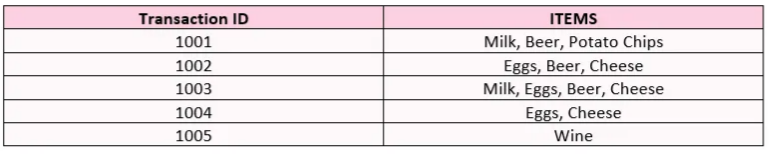



*  Step 1: Calculate the support value of each product.
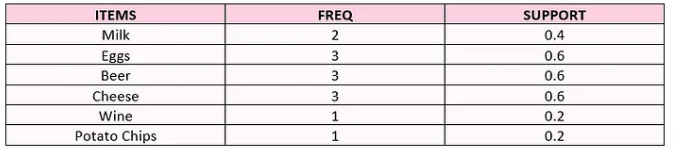





*  Step 2: Eliminate products with support values equal to or below the support threshold determined at the beginning of the process.

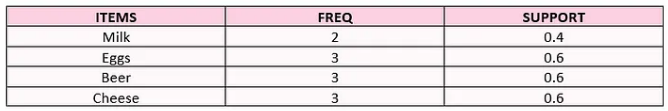






*  Step 3: Identify possible product pairs and calculate support values.
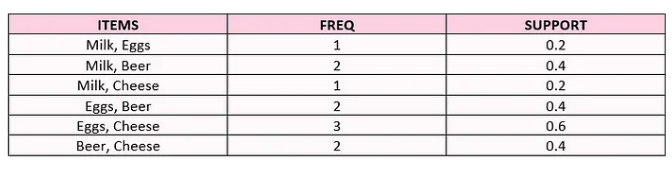





*  Step 4: Eliminate according to the determined support threshold.
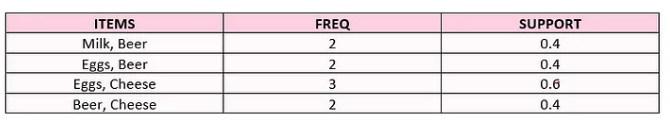





*   Step 5: Identify new possible product pairs and calculate the Support value.
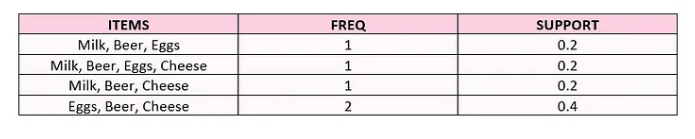




*  Step 6: Eliminate according to the determined support threshold.
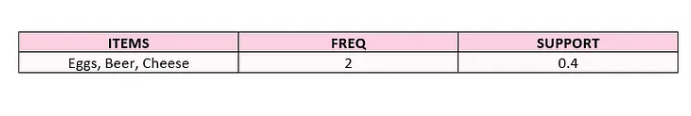





*  Step 7: Final table
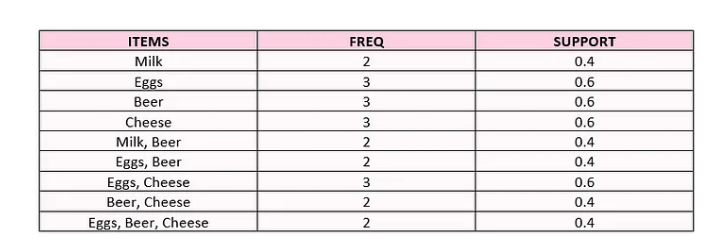



Eggs and beer are observed together in 40% of all purchases. 67% of customers who buy eggs also buy beer. Beer sales increase 1.11 times in egg purchases. According to the final table, these kinds of comments can be made.


# **Implementing market basket analysis**

In [2]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
#Reading Data From Web
myretaildata = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
myretaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Preparation**

In [25]:
#Data Cleaning
myretaildata['Description'] = myretaildata['Description'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str') #converting invoice number to be string
myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')] #remove the credit transactions 
myretaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
#Separating transactions for Germany
mybasket = (myretaildata[myretaildata['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [27]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

# **Training Model**

In [29]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

In [ ]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
#viewing top 100 rules
my_rules.head(100)

# **Making reecommendations**

In [ ]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

In [ ]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()